In [4]:
%load_ext autoreload
%autoreload 2/home/usuario/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


http://ceur-ws.org/Vol-2125/paper_181.pdf

https://www.kaggle.com/c/birdsong-recognition/discussion/160222#895234

https://www.kaggle.com/rohanrao/xeno-canto-bird-recordings-extended-a-m?select=train_extended.csv

https://www.kaggle.com/rohanrao/xeno-canto-bird-recordings-extended-n-z

In [5]:
from pydub import AudioSegment
import pandas as pd
import IPython.display as ipd
from glob import glob
from birds_utils import audio_to_file, get_class_audio_files_npy, mp3_to_samples, DataGeneratorV2, get_extentions, split_audio_files_npy, split_files_simple, get_audio_chunk, get_bin_audio, fix_corrupted_files
from collections import Counter
import numpy as np

In [8]:
# FOLDER = './dataset/extras/'
FOLDER = '/home/usuario/birds/birdsong-recognition/'
TRAIN_FOLDER = FOLDER + 'train_audio/'

# train = pd.read_csv(FOLDER+'train_extended.csv')
train = pd.read_csv(FOLDER+'train.csv')

In [9]:
train.columns

Index(['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'pitch',
       'duration', 'filename', 'speed', 'species', 'number_of_notes', 'title',
       'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude',
       'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3',
       'file_type', 'volume', 'background', 'xc_id', 'url', 'country',
       'author', 'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license'],
      dtype='object')

In [18]:
n_classes = 264
classes = list(dict(Counter(train['ebird_code']).most_common(n_classes)).keys())

In [19]:
len(classes)

264

In [20]:
files_data = np.load('files_std_data_32_bits.npy', allow_pickle=True).item()

In [21]:
extentions = get_extentions(TRAIN_FOLDER)

In [22]:
sr = 22050
TARGET_FOLDER = f'./dataset/bin_{sr}_32/'

In [ ]:
files_data = audio_to_file(TRAIN_FOLDER, TARGET_FOLDER, extentions, classes, target_sr = sr, files_data=files_data, res_type='kaiser_fast', binary_type='float32')

copied:1274, existing:0 / total:1538, /home/usuario/birds/birdsong-recognition/train_audio/leasan/XC498130.mp3, errors: 0Error with file: /home/usuario/birds/birdsong-recognition/train_audio/leasan/XC498130.mp3
copied:1308, existing:0 / total:1573, /home/usuario/birds/birdsong-recognition/train_audio/leasan/XC256862.mp3, errors: 1Error with file: /home/usuario/birds/birdsong-recognition/train_audio/leasan/XC256862.mp3
copied:1664, existing:0 / total:1930, /home/usuario/birds/birdsong-recognition/train_audio/grnher/XC191775.mp3, errors: 2Error with file: /home/usuario/birds/birdsong-recognition/train_audio/grnher/XC191775.mp3
copied:2063, existing:0 / total:2330, /home/usuario/birds/birdsong-recognition/train_audio/commer/XC148448.mp3, errors: 3Error with file: /home/usuario/birds/birdsong-recognition/train_audio/commer/XC148448.mp3
copied:2340, existing:0 / total:2608, /home/usuario/birds/birdsong-recognition/train_audio/amtspa/XC310909.mp3, errors: 44Error with file: /home/usuario/bir

In [ ]:
np.save('files_std_data_32_bits.npy', files_data)

In [ ]:
# files_data.keys()

In [14]:
fix_corrupted_files(files_data, TRAIN_FOLDER)

21340

In [27]:
class_audiofiles = get_class_audio_files_npy(TARGET_FOLDER, classes=classes, min_duration=5, extention='.npy', sr=sr, durations=False)

In [33]:
for cl, files in class_audiofiles.items():
    print(cl, len(files['files']))

redcro 1689
houspa 1178
houwre 946
comrav 863
eursta 674
sonspa 597
barswa 559
rewbla 455
norcar 434
amerob 405
mallar3 396
spotow 372
swathr 361
carwre 358
bewwre 343
eucdov 301
warvir 298
comyel 288
daejun 252
blujay 229
grycat 231
normoc 224
whbnut 223
marwre 221
wesmea 210
whcspa 206
amered 195
grhowl 188
comter 186
bkcchi 183
gnwtea 180
houfin 177
comred 176
ruckin 176
herthr 172
whtspa 165
chispa 162
eastow 157
savspa 152
tuftit 151
easmea 150
cangoo 149
amecro 145
horlar 144
norwat 133
aldfly 131
wlswar 128
woothr 126
buggna 125
brncre 119
grtgra 117
wilfly 112
norfli 111
wewpew 112
bulori 111
orcwar 111
winwre3 108
bkhgro 103
astfly 101
lesgol 101
osprey 97
indbun 97
bnhcow 96
mouchi 94
grcfly 93
norpar 92
ovenbi1 92
reevir1 92
bawwar 91
haiwoo 89
stejay 88
yerwar 87
macwar 86
greegr 83
hoowar 81
magwar 82
amegfi 81
linspa 80
dowwoo 79
veery 70
purfin 73
foxspa 72
pasfly 69
canwre 67
leafly 67
balori 66
eawpew 66
banswa 57
perfal 57
bkpwar 54
chswar 54
lesyel 51
rebwoo 53
hergu

In [28]:
# glob('./dataset/npy_22050/'+'**/*', recursive=True)

In [29]:
train_files, val_files, train_labels, val_labels = split_files_simple(class_audiofiles, ratio = 0.2)

redcro 0.20011841326228538
houspa 0.200339558573854
houwre 0.19978858350951373
comrav 0.20046349942062572
eursta 0.20029673590504452
sonspa 0.19932998324958123
barswa 0.2003577817531306
rewbla 0.2
norcar 0.20046082949308755
amerob 0.2
mallar3 0.1994949494949495
spotow 0.1989247311827957
swathr 0.1994459833795014
carwre 0.2011173184357542
bewwre 0.20116618075801748
eucdov 0.19933554817275748
warvir 0.20134228187919462
comyel 0.2013888888888889
daejun 0.1984126984126984
blujay 0.20087336244541484
grycat 0.19913419913419914
normoc 0.20089285714285715
whbnut 0.20179372197309417
marwre 0.19909502262443438
wesmea 0.2
whcspa 0.19902912621359223
amered 0.2
grhowl 0.20212765957446807
comter 0.1989247311827957
bkcchi 0.20218579234972678
gnwtea 0.2
houfin 0.1977401129943503
comred 0.19886363636363635
ruckin 0.19886363636363635
herthr 0.19767441860465115
whtspa 0.2
chispa 0.19753086419753085
eastow 0.19745222929936307
savspa 0.19736842105263158
tuftit 0.1986754966887417
easmea 0.2
cangoo 0.2013422

In [1]:
std_stats = np.load('files_std_data.npy', allow_pickle=True).item()

NameError: name 'np' is not defined

In [41]:
# np.save('class_audiofiles.npy', class_audiofiles)

In [42]:
# class_audiofiles

In [43]:
# train_files, val_files, train_labels, val_labels = split_audio_files_npy(class_audiofiles, min_duration=5, ratio = 0.2, extention='.npy', sr=sr)

In [13]:
np.save(f'train_files_{sr}_{n_classes}_librosa.npy', train_files)
np.save(f'val_files_{sr}_{n_classes}_librosa.npy', val_files)
np.save(f'train_labels_{sr}_{n_classes}_librosa.npy', train_labels)
np.save(f'val_labels_{sr}_{n_classes}_librosa.npy', val_labels)

In [337]:
clip = np.load(TARGET_FOLDER + classes[2] + '/XC109299.mp3.npy')
clip.std(), clip.mean()

(1.0375997590784087, 2.6170983365312877e-18)

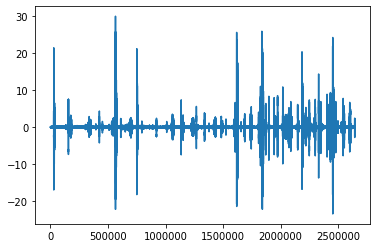

In [334]:
plt.plot(clip)

In [347]:
class_audiofiles, train_files, val_files, train_labels, val_labels = get_class_audio_files_npy(TARGET_FOLDER)

0.21361009081555837
0.20091738827949074
0.2179879152296707


In [351]:
dgen_train = DataGeneratorV2(train_files, train_labels)

{'aldfly': 0, 'amecro': 1, 'amegfi': 2}


In [352]:
for x, y in dgen_train:
    break

In [354]:
x.shape, y.shape

((32, 110250, 1), (32, 3))

In [ ]:
def get_spectrum(x):
    X = librosa.stft(x, )
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    return Xdb

In [ ]:
birds_codes = train['ebird_code'].unique()
print(birds_codes[:100])

In [ ]:
import os

In [ ]:
def get_bird_data(dataset_folder, ebird_code, target_sr = 22050, chunk_seconds=2, rating_thres = 4, std_thres=0.1, save=True):
    under_tres = []
    if not os.path.exists(dataset_folder):
        os.makedirs(dataset_folder)
    total_duration = 0
    df_aldfly = train[train['ebird_code']==ebird_code]
    chunk_size = chunk_seconds*target_sr
    ebird_folder = dataset_folder + ebird_code + '/'
    if not os.path.exists(ebird_folder):
        os.makedirs(ebird_folder)
    for i in range(len(df_aldfly)):
        df_row = df_aldfly.iloc[i]
        rating = df_row['rating']
        if rating>=rating_thres:
            dataframe = df_aldfly.iloc[i]
            x, orig_sr, duration = get_train_clip(dataframe, target_sr)
            print(f'\r{i}, {orig_sr}, {duration}', end='')
            x = x[:(len(x)//chunk_size)*chunk_size].reshape(-1, chunk_size)
            
            total_duration = total_duration + duration
            
            for j, row in enumerate(x):
                row_std = row.std()
                
                if row_std > std_thres:
                    # print(j, row.mean(), row.std())
                    if save:
                        file_to_save = ebird_folder + ''.join(dataframe['filename'].split('.')[:-1]) + f'_{j+1}.npy'
                        if not os.path.exists(file_to_save):
                            np.save(file_to_save, row)

                else:
                    under_tres.append(row)
    return under_tres

In [92]:
from matplotlib import pyplot as plt
import numpy as np
from birds_utils import save_class_dataset, get_train_clip

In [9]:
target_sr = 22050
chunk_seconds = 2
hop_seconds = 1/5
std_thres = 0.5
classes = ['amegfi', 'amecro', 'aldfly']
dataset_folder = './dataset/all/'
for cl in classes:
    save_class_dataset(train, dataset_folder, cl, target_sr = target_sr, chunk_seconds=chunk_seconds, hop_seconds=hop_seconds, std_thres = std_thres)
    print()
# save_class_dataset(train, './dataset/all/', 'amecro', target_sr = target_sr, chunk_seconds=chunk_seconds, hop_seconds=hop_seconds, std_thres = std_thres)
# print()
# save_class_dataset(train, './dataset/all/', 'aldfly', target_sr = target_sr, chunk_seconds=chunk_seconds, hop_seconds=hop_seconds, std_thres = std_thres)

383 - ./dataset/all/amegfi/XC51411_384_2_0.2.npyypy
1360 - ./dataset/all/amecro/XC51410_1361_2_0.2.npyy
89 - ./dataset/all/aldfly/XC78890_90_2_0.2.npynpypy


In [10]:
from glob import glob
for cl in classes:
    dataset_folder_cl = dataset_folder + cl
    print(len(glob(dataset_folder_cl+'**/*', recursive=True)))
# 17657 para amegfi hop_seconds=0.25
# 4436 para amegfi hop_seconds=1

28376
26693
25243


In [11]:
# chunk_1 = np.load(f'./dataset/all/aldfly/XC134874_1_{chunk_seconds}_{hop_seconds}.npy')
# chunk_2 = np.load(f'./dataset/all/aldfly/XC134874_2_{chunk_seconds}_{hop_seconds}.npy')
# plt.plot(chunk_1)
# plt.show()
# plt.plot(chunk_2)
# ipd.Audio(chunk_1, rate=target_sr)

In [12]:
# dataset_folder = './dataset/all/'
# sr = 22050
# chunk_seconds = 2
# rating_thres = 1
# _ = get_bird_data(dataset_folder, 'amecro', target_sr = 22050, chunk_seconds=chunk_seconds, rating_thres = rating_thres)
# _ = get_bird_data(dataset_folder, 'aldfly', target_sr = 22050, chunk_seconds=chunk_seconds, rating_thres = rating_thres)
# _ = get_bird_data(dataset_folder, 'amegfi', target_sr = 22050, chunk_seconds=chunk_seconds, rating_thres = rating_thres)

In [13]:
# stds = [x.std() for x in X_amecro]

In [14]:
# indxs = np.argsort(stds)
# N = 200
# print(indxs[:N])
# print(np.array(stds)[indxs][:N])

In [15]:
# ipd.Audio(X_amecro[1406], rate=sr)

In [16]:
# ((299, 44100), (406, 44100)
# X_ameavo = get_bird_data(dataset_folder, 'ameavo', target_sr = 22050, chunk_seconds=2)
# X_amebit = get_bird_data('amebit', target_sr = 22050, chunk_seconds=2)

In [180]:
from birds_utils import create_train_val_folders, create_train_val_folders_with_diff_files, get_class_audio_files

In [18]:
dataset_folder = './dataset/'
create_train_val_folders_with_diff_files(dataset_folder, ratio=0.2, all_subfolder='all/', train_subfolder='train/', val_subfolder='val/')

./dataset/train/
./dataset/val/
0.20591344798421202
0.21079111040684545
0.2187464878432548


In [19]:
all_subfolder = 'all/'
train_subfolder = 'train/'
val_subfolder = 'val/'

In [20]:
dataset_folder_all = dataset_folder + all_subfolder
dataset_folder_train = dataset_folder + train_subfolder
dataset_folder_val = dataset_folder + val_subfolder

In [21]:
from glob import glob

In [22]:
len(glob(dataset_folder_train+'**/*', recursive=True))

63312

In [23]:
len(glob(dataset_folder_val+'**/*', recursive=True))

17006

In [24]:
len(glob(dataset_folder_all+'**/*', recursive=True))

80315

In [33]:
! ls {TRAIN_FOLDER}/aldfly

XC134874.mp3  XC154310.mp3  XC189044.mp3  XC244459.mp3	XC331564.mp3
XC135454.mp3  XC154449.mp3  XC189045.mp3  XC245645.mp3	XC334685.mp3
XC135455.mp3  XC157462.mp3  XC189262.mp3  XC247799.mp3	XC370826.mp3
XC135456.mp3  XC167789.mp3  XC189263.mp3  XC247801.mp3	XC370881.mp3
XC135457.mp3  XC167791.mp3  XC189264.mp3  XC253455.mp3	XC370932.mp3
XC135459.mp3  XC16967.mp3   XC189265.mp3  XC2628.mp3	XC371412.mp3
XC135460.mp3  XC178480.mp3  XC189266.mp3  XC264715.mp3	XC373885.mp3
XC135883.mp3  XC178481.mp3  XC189267.mp3  XC269063.mp3	XC374636.mp3
XC137570.mp3  XC178485.mp3  XC189268.mp3  XC283162.mp3	XC374638.mp3
XC138639.mp3  XC179417.mp3  XC189269.mp3  XC294255.mp3	XC376468.mp3
XC139577.mp3  XC179600.mp3  XC189589.mp3  XC296725.mp3	XC380033.mp3
XC140298.mp3  XC180091.mp3  XC189590.mp3  XC302253.mp3	XC381871.mp3
XC142065.mp3  XC181484.mp3  XC189592.mp3  XC31060.mp3	XC406251.mp3
XC142066.mp3  XC182735.mp3  XC193116.mp3  XC317112.mp3	XC414551.mp3
XC142067.mp3  XC188377.mp3  XC194087.mp3  XC317903.

In [37]:
cl_folder

'/home/usuario/birds/birdsong-recognition/train_audio/amecro'

In [54]:
from pydub.utils import mediainfo

In [197]:
%%time
class_audiofiles, train_files, val_files, train_labels, val_labels = get_class_audio_files(
    TRAIN_FOLDER, 
    classes=['amegfi', 'amecro', 'aldfly'],
    min_duration=5,
    ratio=0.2
)

0.20368746531286255
0.22052467370949122
0.2029195400246637
CPU times: user 118 ms, sys: 4.2 s, total: 4.32 s
Wall time: 27.5 s


In [198]:
len(val_labels), len(train_labels)

(51, 242)

In [200]:
np.save('train_files.npy', train_files)
np.save('val_files.npy', val_files)
np.save('train_labels.npy', train_labels)
np.save('val_labels.npy', val_labels)

In [210]:
np.unique(train_labels)

array(['aldfly', 'amecro', 'amegfi'], dtype='<U6')

In [207]:
# val_labels[:14], val_files[:15]

In [252]:
for i in range(batch_size):
    filename = class_audiofiles['amegfi']['files'][i]
    x, orig_sr, duration = get_train_clip(filename, resample=sample_size, chunk_size=5)
    audio_batch.append(x)

NameError: name 'sample_size' is not defined

In [212]:
from tensorflow.keras.utils import Sequence

In [253]:
dgen = DataGeneratorV2(train_files, train_labels)

{'aldfly': 0, 'amecro': 1, 'amegfi': 2}


In [254]:
for x, y in dgen:
    break

In [255]:
x.shape, y.shape

((32, 110250, 1), (32, 3))

In [256]:
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

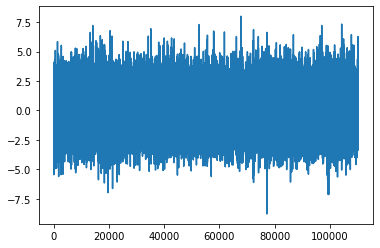

In [259]:
plt.plot(x[0,:, 0])

In [260]:
ipd.Audio(x[0,:, 0], rate=22050)

In [136]:
%%time

batch_size = 50
audio_batch = []
for i in range(batch_size):
    filename = class_audiofiles['amegfi']['files'][i]
    x, orig_sr, duration = get_train_clip(filename, resample=22050, chunk_size=5)
    audio_batch.append(x)
audio_batch = np.array(audio_batch)

CPU times: user 2.5 s, sys: 1.02 s, total: 3.52 s
Wall time: 10.4 s


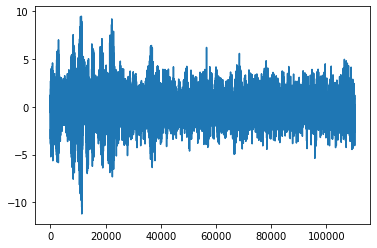

In [139]:
plt.plot(audio_batch[2])

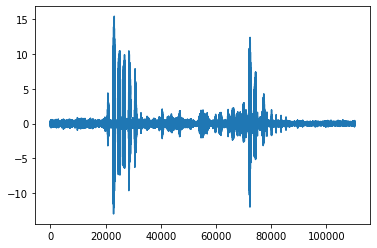

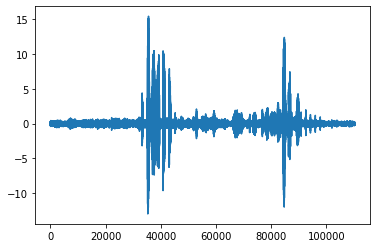

In [133]:
filename = class_audiofiles['amegfi']['files'][1]
x, orig_sr, duration = get_train_clip(filename, resample=22050, chunk_size=5)
plt.plot(x)
plt.show()
x, orig_sr, duration = get_train_clip(filename, resample=22050, chunk_size=5)
plt.plot(x)
# ipd.Audio(aud, rate=22050) 

In [120]:
%%time
info = mediainfo(class_audiofiles['amegfi']['files'][1])

CPU times: user 321 µs, sys: 9.13 ms, total: 9.46 ms
Wall time: 79.6 ms


In [121]:
%%time
aud, orig_sr, duration = get_train_clip(class_audiofiles['amegfi']['files'][1], resample=22050)

CPU times: user 34.6 ms, sys: 21.4 ms, total: 56 ms
Wall time: 165 ms


In [117]:
info

{'index': '0',
 'codec_name': 'mp3',
 'codec_long_name': 'MP3 (MPEG audio layer 3)',
 'profile': 'unknown',
 'codec_type': 'audio',
 'codec_time_base': '1/48000',
 'codec_tag_string': '[0][0][0][0]',
 'codec_tag': '0x0000',
 'sample_fmt': 's16p',
 'sample_rate': '48000',
 'channels': '1',
 'channel_layout': 'mono',
 'bits_per_sample': '0',
 'id': 'N/A',
 'r_frame_rate': '0/0',
 'avg_frame_rate': '0/0',
 'time_base': '1/14112000',
 'start_pts': '0',
 'start_time': '0.000000',
 'duration_ts': '715354038',
 'duration': '50.691188',
 'bit_rate': '128646',
 'max_bit_rate': 'N/A',
 'bits_per_raw_sample': 'N/A',
 'nb_frames': 'N/A',
 'nb_read_frames': 'N/A',
 'nb_read_packets': 'N/A',
 'DISPOSITION': {'default': '0',
  'dub': '0',
  'original': '0',
  'comment': '0',
  'lyrics': '0',
  'karaoke': '0',
  'forced': '0',
  'hearing_impaired': '0',
  'visual_impaired': '0',
  'clean_effects': '0',
  'attached_pic': '0',
  'timed_thumbnails': '0'},
 'filename': '/home/usuario/birds/birdsong-recogn

In [115]:
duration, class_audiofiles['amegfi']['durations'][1]

(50.64, 50.691188)

In [79]:
np.random.shuffle(list(range(len(class_audiofiles['amegfi']['files']))))

In [98]:
class_audiofiles['amegfi']['files'][0]

'/home/usuario/birds/birdsong-recognition/train_audio/amegfi/XC192099.mp3'

In [103]:
np.str_

numpy.str_